In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Datasets/cars_cleaned.csv')
df.head()

,Unnamed: 0,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
0,0,FERRARI,SF90 STRADALE,V8,3990.0,963.0,340.0,2.5,1100000.0,plug in hyrbrid,2,800.0
1,1,ROLLS ROYCE,PHANTOM,V12,6749.0,563.0,250.0,5.3,460000.0,Petrol,5,900.0
2,2,Ford,KA+,1.2L Petrol,1200.0,70.0,165.0,10.5,12000.0,Petrol,5,100.0
3,3,MERCEDES,GT 63 S,V8,3982.0,630.0,250.0,3.2,161000.0,Petrol,4,900.0
4,4,AUDI,AUDI R8 Gt,V10,5204.0,602.0,320.0,3.6,253290.0,Petrol,2,560.0


### Data Cleaning

In [3]:
## Deleteing unnecesary columns
df.drop(columns=['Unnamed: 0','Cars Names','Engines'],inplace=True)
df.head()

,Company Names,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
0,FERRARI,3990.0,963.0,340.0,2.5,1100000.0,plug in hyrbrid,2,800.0
1,ROLLS ROYCE,6749.0,563.0,250.0,5.3,460000.0,Petrol,5,900.0
2,Ford,1200.0,70.0,165.0,10.5,12000.0,Petrol,5,100.0
3,MERCEDES,3982.0,630.0,250.0,3.2,161000.0,Petrol,4,900.0
4,AUDI,5204.0,602.0,320.0,3.6,253290.0,Petrol,2,560.0


In [4]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()
encoded = encoder.fit_transform(df[['Company Names']]).toarray()
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['Company Names']))
df = pd.concat([df,encoded_df],axis=1)
df.head(2)

,Company Names,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque,Company Names_ASTON MARTIN,...,Company Names_Porsche,Company Names_ROLLS ROYCE,Company Names_ROLLS ROYCE,Company Names_TOYOTA,Company Names_Tata Motors,Company Names_Tesla,Company Names_Toyota,Company Names_VOLVO,Company Names_Volkswagen,Company Names_Volvo
0,FERRARI,3990.0,963.0,340.0,2.5,1100000.0,plug in hyrbrid,2,800.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ROLLS ROYCE,6749.0,563.0,250.0,5.3,460000.0,Petrol,5,900.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
## encoding Fuel type
df['Fuel Types'].unique()

array(['plug in hyrbrid', 'Petrol', 'Diesel', 'Hybrid', 'Electric',
       'Petrol/Diesel', 'Plug-in Hybrid', 'Petrol/AWD', 'Petrol/Hybrid',
       'Hydrogen', 'Diesel/Petrol', 'Petrol/EV', 'Hybrid/Electric',
       'Petrol, Hybrid', 'Petrol, Diesel', 'Hybrid (Petrol)',
       'CNG/Petrol', 'Hybrid/Petrol', 'Hybrid (Gas + Electric)',
       'Gas / Hybrid', 'Hybrid / Plug-in'], dtype=object)

In [6]:
## So many fuel types(deleting it too)
df.drop(columns=['Fuel Types'],inplace=True)
df.head()

,Company Names,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Seats,Torque,Company Names_ASTON MARTIN,Company Names_AUDI,...,Company Names_Porsche,Company Names_ROLLS ROYCE,Company Names_ROLLS ROYCE,Company Names_TOYOTA,Company Names_Tata Motors,Company Names_Tesla,Company Names_Toyota,Company Names_VOLVO,Company Names_Volkswagen,Company Names_Volvo
0,FERRARI,3990.0,963.0,340.0,2.5,1100000.0,2,800.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ROLLS ROYCE,6749.0,563.0,250.0,5.3,460000.0,5,900.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Ford,1200.0,70.0,165.0,10.5,12000.0,5,100.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,MERCEDES,3982.0,630.0,250.0,3.2,161000.0,4,900.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AUDI,5204.0,602.0,320.0,3.6,253290.0,2,560.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df['Company Names'].unique()

array(['FERRARI', 'ROLLS ROYCE', 'Ford', 'MERCEDES', 'AUDI', 'BMW',
       'ASTON MARTIN', 'BENTLEY', 'LAMBORGHINI', 'TOYOTA', 'NISSAN',
       'ROLLS ROYCE ', 'VOLVO', 'KIA', 'HONDA', 'KIA  ', 'HYUNDAI',
       'MAHINDRA', 'MARUTI SUZUKI', 'Volkswagen', 'Nissan', 'Porsche',
       'Cadillac', 'Tata Motors', 'Tesla', 'Jeep', 'Mazda', 'Chevrolet',
       'GMC', 'Kia', 'Peugeot', 'Bugatti', 'Volvo', 'Jaguar Land Rover',
       'Acura', 'Mitsubishi', 'Toyota'], dtype=object)

In [8]:
col = 'Cars Prices'          #### Moving the Car Price column to the last position
df = df[[c for c in df.columns if c != col] + [col]]
df.head(2)

,Company Names,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Seats,Torque,Company Names_ASTON MARTIN,Company Names_AUDI,Company Names_Acura,...,Company Names_ROLLS ROYCE,Company Names_ROLLS ROYCE,Company Names_TOYOTA,Company Names_Tata Motors,Company Names_Tesla,Company Names_Toyota,Company Names_VOLVO,Company Names_Volkswagen,Company Names_Volvo,Cars Prices
0,FERRARI,3990.0,963.0,340.0,2.5,2,800.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1100000.0
1,ROLLS ROYCE,6749.0,563.0,250.0,5.3,5,900.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,460000.0


In [9]:
q1=df['Cars Prices'].quantile(0.25)    #### Removing the Outliers in the car prices
q2=df['Cars Prices'].quantile(0.75)
iqr=q2-q1
upper_fence = q2+1.5*iqr
lower_fence = q1-1.5*iqr
df = df[(df['Cars Prices'] >= lower_fence) & (df['Cars Prices'] <= upper_fence)]
df.shape

(1052, 45)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1052 entries, 2 to 1199
Data columns (total 45 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Company Names                    1052 non-null   object 
 1   CC/Battery Capacity              1052 non-null   float64
 2   HorsePower                       1052 non-null   float64
 3   Total Speed                      1052 non-null   float64
 4   Performance(0 - 100 )KM/H        1052 non-null   float64
 5   Seats                            1052 non-null   int64  
 6   Torque                           1052 non-null   float64
 7   Company Names_ASTON MARTIN       1052 non-null   float64
 8   Company Names_AUDI               1052 non-null   float64
 9   Company Names_Acura              1052 non-null   float64
 10  Company Names_BENTLEY            1052 non-null   float64
 11  Company Names_BMW                1052 non-null   float64
 12  Company Names_Bugatti    

In [11]:
df.drop(columns='Company Names',axis=1,inplace=True)

### Model Training

In [12]:
## So Now moving towards model training
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [13]:
X.head()

,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Seats,Torque,Company Names_ASTON MARTIN,Company Names_AUDI,Company Names_Acura,Company Names_BENTLEY,...,Company Names_Porsche,Company Names_ROLLS ROYCE,Company Names_ROLLS ROYCE,Company Names_TOYOTA,Company Names_Tata Motors,Company Names_Tesla,Company Names_Toyota,Company Names_VOLVO,Company Names_Volkswagen,Company Names_Volvo
2,1200.0,70.0,165.0,10.5,5,100.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,2998.0,382.0,250.0,4.1,2,500.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
18,1998.0,205.0,226.0,6.4,4,205.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
19,2387.0,228.0,226.0,5.6,4,250.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
20,5663.0,381.0,220.0,6.7,7,500.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
y

2       12000.0
17      53900.0
18      27000.0
19      30000.0
20      85000.0
         ...   
1194    30000.0
1196    43590.0
1197    50000.0
1198    25210.0
1199    29000.0
Name: Cars Prices, Length: 1052, dtype: float64

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [17]:
X_train

array([[ 0.02821709, -0.48156394, -0.32558813, ..., -0.06541866,
        -0.32963831, -0.10021498],
       [-0.25977381, -0.96170792, -0.71421825, ..., -0.06541866,
        -0.32963831, -0.10021498],
       [-0.25862644, -0.33201089,  0.45167211, ..., -0.06541866,
        -0.32963831, -0.10021498],
       ...,
       [ 1.84278924,  1.09267864,  0.45167211, ..., -0.06541866,
        -0.32963831, -0.10021498],
       [-0.25977381, -0.96170792, -1.8801086 , ..., -0.06541866,
        -0.32963831, -0.10021498],
       [-0.83231349, -1.23720037, -0.06650138, ..., -0.06541866,
        -0.32963831, -0.10021498]], shape=(704, 43))

In [18]:
X_test

array([[ 0.01674335, -0.43433666, -0.06650138, ..., -0.06541866,
        -0.32963831, -0.10021498],
       [-0.49326444, -0.96170792, -0.58467487, ..., -0.06541866,
        -0.32963831, -0.10021498],
       [-0.2603475 , -0.79641245, -0.32558813, ..., -0.06541866,
        -0.32963831, -0.10021498],
       ...,
       [ 0.25424979,  0.69124679,  1.74710583, ..., -0.06541866,
        -0.32963831, -0.10021498],
       [ 0.02821709, -0.48156394, -0.32558813, ..., -0.06541866,
        -0.32963831, -0.10021498],
       [-0.54661734, -1.04042005, -0.32558813, ..., -0.06541866,
         3.03362795, -0.10021498]], shape=(348, 43))

### Final Conclusion
There are some outliers left even after removing outliers from car prices. but overall the model is performing well with R square = 0.86 backed by ajusted R Square = 0.84

### ElasticNetCV ML Algorithm

NameError: name 'mean_absolute_error' is not defined

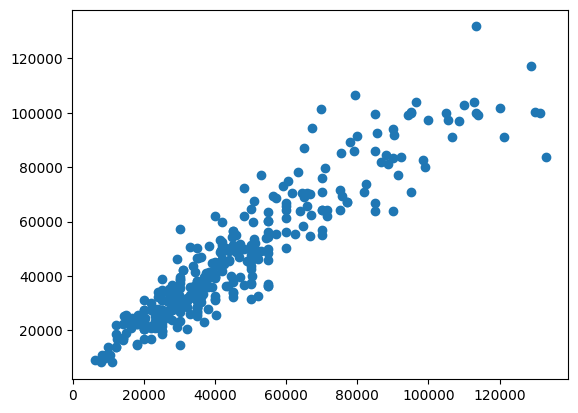

In [19]:
from sklearn.linear_model import ElasticNetCV

elasticcv=ElasticNetCV(cv=5,
                        l1_ratio=[.1, .3, .5, .7, .9, .95, .99, 1],
                        alphas=None,
                        random_state=42)
elasticcv.fit(X_train,y_train)
y_pred=elasticcv.predict(X_test)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

In [20]:
scaler


StandardScaler()

In [21]:
elasticcv

ElasticNetCV(cv=5, l1_ratio=[0.1, 0.3, 0.5, 0.7, 0.9, 0.95, 0.99, 1],
             random_state=42)

In [22]:
import pickle
pickle.dump(scaler,open('C:/Users/ABC/Documents/Car Prediction Project/models/scaler.pkl','wb'))
pickle.dump(elasticcv,open('C:/Users/ABC/Documents/Car Prediction Project/models/elasticcv.pkl','wb'))